-0.968873647802498
-0.9701183080343541
0.9984918425574284


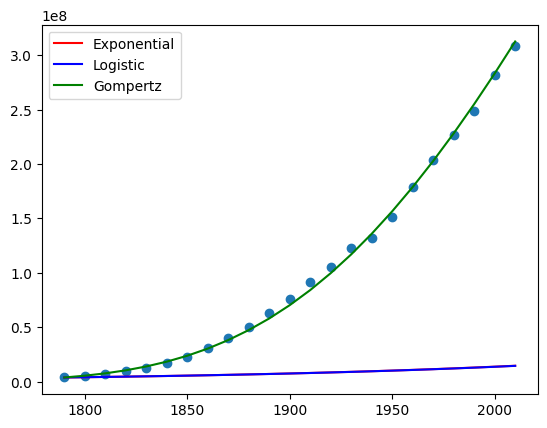

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def expo_model(P,t):
  dydt = r * P
  return dydt

def logistic_model(P, t):
  dydt = r * (1 - P/L) * P
  return dydt

def gompertz_model(P, t):
  dydt = r * np.log(L / P) * P
  return dydt

#set parameters
y0 = 3929214
r = 0.006 #growth rate
L = 1541000000 #carrying capacity (estimate)

#import data
t = np.linspace(1790, 2010, 23)
pop_data = [3929214, 5308483, 7239861,  9638453, 12866020, 17069453, 23191876, 31443321, 39818449, 50155783, 62947714, 75994575, 91972266,  105710620,  122775046,  131669275, 151325798, 179323175, 203302031, 226545805, 248718302, 281424603, 308745538]

#solutions for odes
Expo_sol = odeint(expo_model, y0, t)
Log_sol = odeint(logistic_model, y0, t)
Gomp_sol = odeint(gompertz_model, y0, t)

#plot the different diff eqs
plt.plot(t, pop_data, "o")
plt.plot(t, odeint(expo_model, y0, t), label='Exponential', color='red')
plt.plot(t, odeint(logistic_model, y0, t), label='Logistic', color='blue')
plt.plot(t, odeint(gompertz_model, y0, t), label ='Gompertz', color='green')

from sklearn.metrics import r2_score
R_expo = r2_score(pop_data, Expo_sol)
R_log = r2_score(pop_data, Log_sol)
R_Gomp = r2_score(pop_data, Gomp_sol)
print(R_expo)
print(R_log)
print(R_Gomp)
plt.legend()
plt.show()



In [ ]:
r_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023]
print("r value  Exponential   Logistic    Gompertz")
for i in r_values:
  r = i
  Gomp_sol = odeint(gompertz_model, y0, t)
  Expo_sol = odeint(expo_model, y0, t)
  Log_sol = odeint(logistic_model, y0, t)
  R_expo = r2_score(pop_data, Expo_sol)
  R_log = r2_score(pop_data, Log_sol)
  R_Gomp = r2_score(pop_data, Gomp_sol)
  print(f"{r}     {R_expo:.4f}      {R_log:.4f}     {R_Gomp:.4f}")


r value  Exponential   Logistic    Gompertz
0.001     -1.1141      -1.1141     -0.9920
0.002     -1.0944      -1.0945     -0.7213
0.003     -1.0708      -1.0711     -0.2904
0.004     -1.0427      -1.0431     0.2567
0.005     -1.0090      -1.0098     0.7689
0.006     -0.9689      -0.9701     0.9985
0.007     -0.9209      -0.9229     0.6578
0.008     -0.8638      -0.8668     -0.5070
0.009     -0.7959      -0.8004     -2.6572
0.01     -0.7154      -0.7222     -5.8390
0.018     0.5317      0.4467     -52.8167
0.019     0.7178      0.6285     -59.1526
0.02     0.8514      0.7851     -65.2801
0.021     0.8738      0.8917     -71.1659
0.022     0.6890      0.9158     -76.7906
0.023     0.1423      0.8174     -82.1454


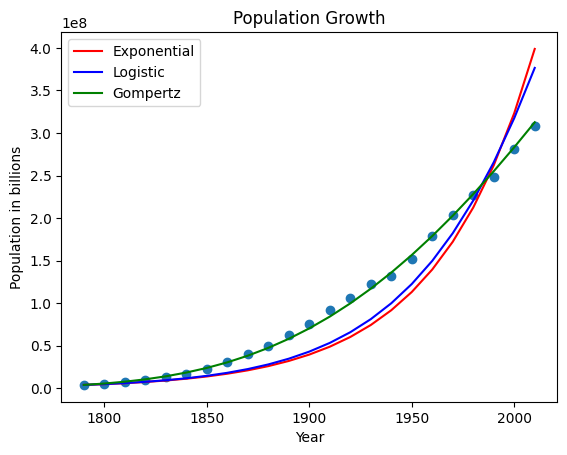

In [ ]:
#plot the different diff eqs
plt.plot(t, pop_data, "o")
r = 0.021 #diff optimal r for each model
plt.plot(t, odeint(expo_model, y0, t), label='Exponential', color='red')
r = 0.022
plt.plot(t, odeint(logistic_model, y0, t), label='Logistic', color='blue')
r = 0.006
plt.plot(t, odeint(gompertz_model, y0, t), label ='Gompertz', color='green')
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.title("Population Growth")
plt.legend()
plt.show()


In my code above, I tested different r-values until I found one that was close to 1. From the Gompertz column, we see that 0.9729 is our closest $R^2$ value with an r-value of 0.009, so that will be our $r$.

In my model below, I solved the different growth models we were told, exponential, logarithmic, and Gompertz model. I plotted all of the solutions and gave them all similar parameters until I found a model that closely matches the data. I thought that the exponential model probably fits this data the best only because from looking the points it looked concave up the entire time, and the other models suggest at some point they become concave down and start slowing their growth. Below, I am going to plot the exponential growth function solution with my points and going to try to find specific parameters that match it even closer.

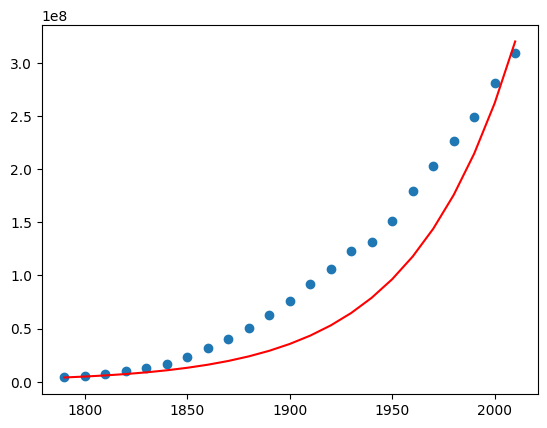

In [ ]:
r = 0.02 #trying a better growth rate
plt.plot(t, pop_data, "o")
plt.plot(t, odeint(expo_model, y0, t), label='Exponential', color='red')
plt.show()

PPGR measures how much one unit of population contributes to the growth. Since PPGR = 1/P dPdt. dPdt is people per decade, and 1/P is per person. So we are then left just with per decade as the units for our PPGR. If we were given an estime that human PPGR is equal to 1/2 per years because women are half of the population I would say this is too high. If women are half of the population, only a percentage of them are at an age to be pregnant and only a few women have multiple kids in even 2 years. So saying that each woman contributes to another person every year is way to high.

To estimate a better $PPGR$ I am going to say about $5%$ of women have a kid once a year, giving us a new $PPGR$ of $\frac{1}{40}$ $(\frac{1}{2} \cdot \frac{1}{20})$. This is a much better estimate, because we are acknowledging the fact that young girls and elderly are unlikely to give birth. As well as there are women that fall into that age range that just may not happen to give birth that year. I specifically chose this number because above when I was looking at the exponential growth model I had, my growth rate set at $0.025$ was the best fitting growth rate as well.

For the most part I would be surprised if $PPGR$ stayed constant, there is too much variance between each year that maybe there are years where more births may just happen (Baby Boom) and lead to an increase in $PPGR$. On the other hand, we could see if there is a decrease in $PPGR$ over a certain amount of time this might hint that we are approaching our carrying capacity in the US.

When looking at the $PPGR$ of each of the models when the population is small, I saw in exponential $PPGR$ only depends on the growth rate, and in the logistical model the $PPGR$ is high because it approaches its maximum ($r$) when $P$ is small. However, the total growth isn't much because $P$ is still small. Finally, with Gompertz model, as our $P$ is small $PPGR$ approaches infinite because $log(\frac{L}{P}) \cdot r$ approaches infinity rapidly.

The $L$ in these models I built is the carrying capacity and has the units people. As $P \rightarrow L$, PPGR in both logisitc model and Gompertz model approach 0. In logistic model this is because the parentheses is 0, and in the Gompertz model its becasue $log(\frac{L}{P})$ approaches 0. This relates to what I see in my plot of all 3 lines above because the logistical and Gompertz model both kind of slow down as our $t$ increases, making them two concave down while our exponential model is concave up. This makes sense for human populations because realistically, there is a limit to how many humans there can be space and resources, the population will start growing slower as we approach our carrying capacity, but from the data we see right now, we are still exponentially growing. However as $t$ gets really big for linear and exponential populations, they keep increasing faster and faster which doesn't make sense because we as humans don't have the resources to support that much growth. However our PPGR in our linear model actually decreases, since $PPGR = \frac{1}{P}$. Our exponential model however, isn't affected by population because $PPGR = r$. The linear model makes sense from the same stance of the logistical and Gompertz model, as our population increases (maybe not towards our carrying capacity in this case) $PPGR$ should decrease, however, in the exponential model, it doesn't change at all with respect to the population, just the growth rate, which doesn't factor in any carrying capacity or overpopulation.

$4)$ Linear model - doesn't match with the image of our data points, and the modeling assumptions we made aren't realistic.

$3)$ Exponential model - matches our data fairly well, however, the modeling assumptions make this model impossible to use to help us predict values, we will be very far off.

$2)$ Logistic model - the logisitic model is fairly symmetric which doesn't really match the later growth in the US population, which leads me away from this model. However, this model doesn't grow quickly while the population is small and the assumptions made in this model are valid.

$1)$ Gompertz model - when we have a low population, this model grows very quick very fast, which isn't realistic for human growth with a small population. However, we are working with data where our population is larger, so thats besides the point. This model also makes good assumptions with dP/dT decreasing as P increases.

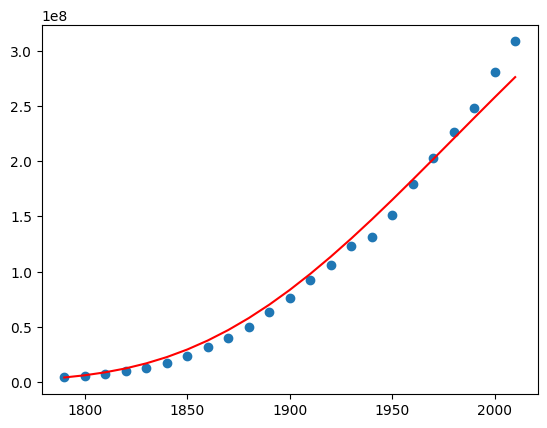

In [ ]:
r = 0.0085 #trying a better growth rate
plt.plot(t, pop_data, "o")
plt.plot(t, odeint(gompertz_model, y0, t), label='Exponential', color='red')
plt.show()

Since I want to be able to predict future populations better, I decided to switch my model to the Gompertz model. The exponential function will increase rapidly which isn't realistic for a population. However, the Gompertz model tapers off as $t$ increases.

24.415823892603406
6.4236507596567565


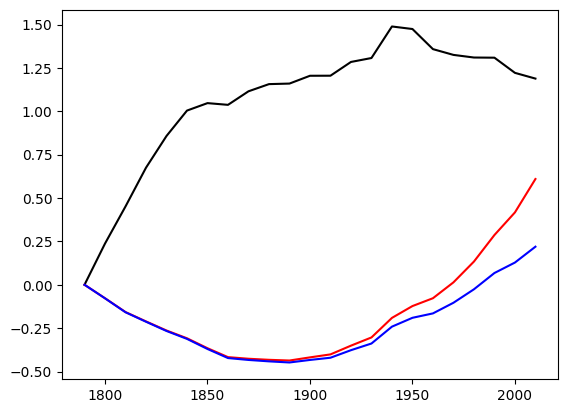

In [ ]:
t = np.linspace(1790, 2010, 23)
r=0.009
Gomp_errors = (odeint(gompertz_model, y0, t).flatten() - pop_data) / pop_data
#switching r to better fit the other models
r = 0.022
Exp_errors = (odeint(expo_model, y0, t).flatten() - pop_data) / pop_data
Log_errors = (odeint(logistic_model, y0, t).flatten() - pop_data) / pop_data

print(sum(abs(Gomp_errors)))
print(sum(abs(Exp_errors)))

plt.plot(t, Gomp_errors, color="black")
plt.plot(t, Exp_errors, color="red")
plt.plot(t, Log_errors, color="blue")
plt.show()

In this code, I calculated the errors for each model and the population data. I could stretch each model to better fit my training data by changing $r$, but the behavior of the models with test data is what I am mostly concerned about. The best model we could use is Gompertz model for this. Because of how it behaves with larger populations, and judging on the fact that is a lower sum of residual errors.

Gompertz Error: 4.626

Logistic Error: 6.423

We can look at how the prediction estimates look for the next couple of decades.

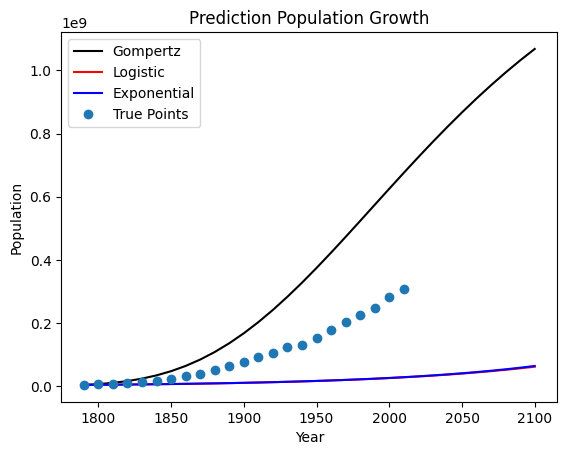

In [ ]:
t = np.linspace(1790, 2100, 32)
t0 = np.linspace(1790, 2010, 23)
r = 0.009 #reset my r
plt.plot(t, odeint(gompertz_model, y0, t), label='Gompertz', color='black')
r = 0.009 #change it for the other models
plt.plot(t, odeint(logistic_model, y0, t), label='Logistic', color='red')
plt.plot(t, odeint(expo_model, y0, t), label='Exponential', color='blue')

plt.plot(t0, pop_data, "o", label = "True Points")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Prediction Population Growth")
plt.legend()
plt.show()


From the graph above, we see that the exponential function skyrockets, while the logistic and Gompertz model both stay realively low and smooth, Gompertz happens to stay under the Logistic model a little. Above, we saw with the errors on our training data that the Gompertz and Logistical model had similar errors, but Gompertz errors was slightly less.

Although our Gompertz model is our best model, all of these models are missing a lot of real-world drivers of the US population. Some examples of these drivers can be immigration and emigration, and life-expectancy rates. However, there also could be unexpected sudden changes in our data with pandemics, wars, or overdose waves. Our model also is assuming a carrying capacity, where realistically we don't have a fixed carrying capacity in the US. All of these things are included in our training data, so our models are adjusted to accomodate for these that have already happened, but not for what could happen in the future. It doesn't assume any net migration growth, or any wide-spread disasters.

Abstract

This project models U.S. population growth with three simple differential-equation models: exponential, logistic, and Gompertz. Let P(t) be population. I estimate each model’s parameters from historical U.S. data and compare the fits. In all cases, the growth rate $r$ has units of 1/year (per year). The logistic model has a carrying capacity $K$, and the Gompertz model has an upper level $L$; both $K$ and $L$ are measured in people.

Results show the exponential model can match short-run growth but tends to predict too high in the long run, because it never slows down. The logistic and Gompertz models both slow as population rises. Logistic is symmetric around K/2, while Gompertz slows earlier and often fits long spans of U.S. data better. However, estimates of K or L depend a lot on which years are used, since the series does not clearly reach a stable plateau. Error checks over time show patterns linked to real-world forces that these simple models ignore: immigration and emigration, and life-expectancy rates, or any wide-spread disasters or wars. These issues break the constant rate of growth we look for in the US as well as and closed-population assumptions.
Overall, these models are useful to summarize trend and make short-term projections, with Gompertz often the best single curve.

Finding $R^2$ values for our growth models against the population data we are given, we can truly sort out which model is best correlated. This is calculated below:

Solving for L is below

In [ ]:
from google.colab import files
data = files.upload()

Saving China population.csv to China population (2).csv


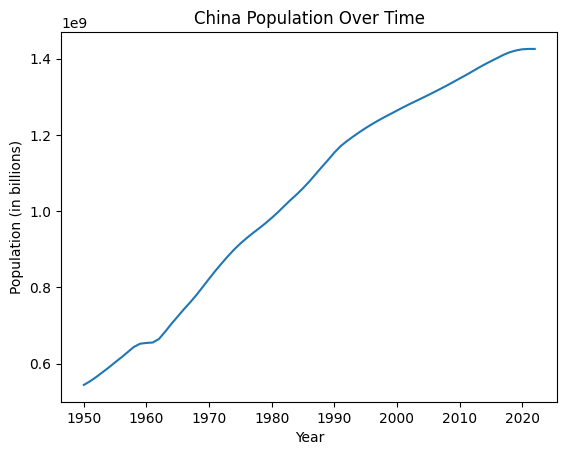

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

china = pd.read_csv("China population.csv") #https://www.kaggle.com/datasets/amritharj/population-of-china-19502022?resource=download KAGGLE DATASET

# Clean the Population column
china["Population"] = china["Population"].str.replace(",", "")

# Convert to numeric
china["Population"] = pd.to_numeric(china["Population"])

# Plot
plt.plot(china["Year"], china["Population"])
plt.xlabel("Year")
plt.ylabel("Population (in billions)")
plt.title("China Population Over Time")
plt.show()

My idea in finding an L value estimate, is to look at China's population. China has similar technology, and economic status as the US, so I will be looking at the main limiting factor of land. I will take China's land:China's Carrying Capacity and create a ratio with the United States land to see what the US carrying capacity would be. Above we see that China's population starts to cap off around 1.5 billion, but they are still growing so I will assume that their carrying capacity is 1.5 billion. China has 9,596,961 km^2 of land, and the US has 9,833,517 km^2. (https://realcountrysizes.com/true-size-of-united-states/). Solving this ratio, I found the US population L to be 1.541 billion people.

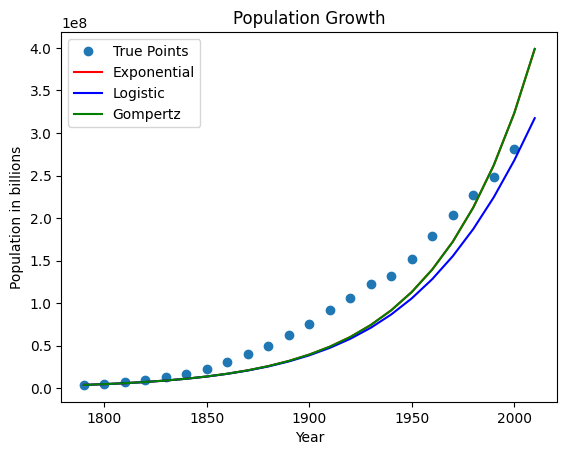

True value for 2010: 308745538.00
Exponential model prediction for 2010: 398791803.20, Error%: 0.2917
Logistic model prediction for 2010: 317449248.77, Error%: 0.0282
Gompertz model prediction for 2010: 1452945898.02, Error%: 3.7060


In [ ]:
#set parameters
y0 = 3929214
L = 1541000000 #carrying capacity (estimate)

#import data
t_short = np.linspace(1790, 2000, 22)
t = np.linspace(1790, 2010, 23)
adjusted_pop = pop_data[:-1]


#solutions for odes
Expo_sol = odeint(expo_model, y0, t)
Log_sol = odeint(logistic_model, y0, t)
Gomp_sol = odeint(gompertz_model, y0, t)

#plot the different diff eqs
plt.plot(t_short, adjusted_pop, "o", label="True Points")
r = 0.021 #diff optimal r for each model
plt.plot(t, Expo_sol, label='Exponential', color='red')
r = 0.022
plt.plot(t, Log_sol, label='Logistic', color='blue')
r = 0.006
plt.plot(t, Expo_sol, label ='Gompertz', color='green')
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.title("Population Growth")
plt.legend()
plt.show()

# Get value at 2010 (last index)
expo_2010 = Expo_sol[-1][0]
logistic_2010 = Log_sol[-1][0]
gompertz_2010 = Gomp_sol[-1][0]
true = pop_data[-1]
ExpoError = (expo_2010 - true) / true
LogError = (logistic_2010 - true) / true
GomError = (gompertz_2010 - true) / true
# Print results
print(f"True value for 2010: {true:.2f}")
print(f"Exponential model prediction for 2010: {expo_2010:.2f}, Error%: {ExpoError:.4f}")
print(f"Logistic model prediction for 2010: {logistic_2010:.2f}, Error%: {LogError:.4f}")
print(f"Gompertz model prediction for 2010: {gompertz_2010:.2f}, Error%: {GomError:.4f}")



Importing world data and analysis below. In the spreadsheet, I used the sum() function on each year to find the total population of the world after each year from 1960-2024.

In [ ]:
y2yt = np.linspace(1960, 2024, 65)
world_pop = [3046620397, 3088984582, 3146030714, 3216524935, 3287650564, 3359614240, 3434737761, 3510064047, 3587367021, 3667263034, 3748832398, 3832102625, 3913866615, 3996855707, 4079622162, 4160931092, 4241275259, 4321154205, 4402729668, 4486780114, 4571916853, 4658753703, 4749594772, 4841781313,  4933839666, 5027721243,  5124087543, 5223022914, 5322743311, 5422743701, 5524088216, 5622402108, 5720261210, 5818021193,  5914384028, 6010340972, 6106651631, 6202777481, 6298925211, 6393998449,  6488003017, 6581894535, 6675446099, 6769100943, 6863590636, 6958407272, 7054276087, 7150235757, 7248149803, 7346959451, 7445352490, 7544993422, 7648553848, 7751485348, 7854014452, 7955506219, 8056928272, 8158220702, 8257529320, 8354923971, 8448113756, 8531826400, 8615820822, 8703542993, 8795003197]

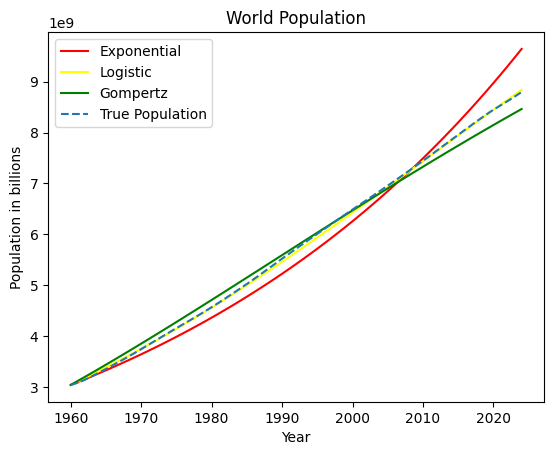

In [ ]:
#parameters
y0 = 3046620397
L = 15000000000 #estimate based on graph starting to taper off

r = 0.018 #diff optimal r for each model
plt.plot(y2yt, odeint(expo_model, y0, y2yt), label='Exponential', color='red')
r = 0.027
plt.plot(y2yt, odeint(logistic_model, y0, y2yt), label='Logistic', color='yellow')
r = 0.016
plt.plot(y2yt, odeint(gompertz_model, y0, y2yt), label ='Gompertz', color='green')
plt.plot(y2yt, world_pop, '--', label="True Population")
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.title("World Population")
plt.legend()
plt.show()

In [ ]:
r_values = [0.01, 0.016, 0.018, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025,0.026, 0.027]
print("r value  Exponential   Logistic    Gompertz")
for i in r_values:
  r = i
  Gomp_sol = odeint(gompertz_model, y0, y2yt)
  Expo_sol = odeint(expo_model, y0, y2yt)
  Log_sol = odeint(logistic_model, y0, y2yt)
  R_expo = r2_score(world_pop, Expo_sol)
  R_log = r2_score(world_pop, Log_sol)
  R_Gomp = r2_score(world_pop, Gomp_sol)
  print(f"{r}     {R_expo:.4f}      {R_log:.4f}     {R_Gomp:.4f}")

r value  Exponential   Logistic    Gompertz
0.01     -0.0420      -0.6102     0.4642
0.016     0.9136      0.2772     0.9932
0.018     0.9744      0.5065     0.9618
0.02     0.8172      0.6956     0.8391
0.021     0.6333      0.7739     0.7466
0.022     0.3643      0.8410     0.6349
0.023     -0.0031      0.8966     0.5055
0.024     -0.4839      0.9404     0.3595
0.025     -1.0948      0.9722     0.1984
0.026     -1.8551      0.9920     0.0234
0.027     -2.7862      0.9996     -0.1643


In [ ]:
world_pop[-1]
Log_sol[-1]


array([8.8393054e+09])